<a href="https://colab.research.google.com/github/ViewKridsakorn/Data-Analyst-Project/blob/main/Car_data_predicted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows :



1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner













# Step 1. Data preview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df = df.drop('Year',axis = 1)
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# step 2. EDA. Analysis

In [ ]:
#Explore Car Names
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
##top 10 common car
car_name = df['Car_Name'].value_counts()
car_name = car_name.head(10)
car_name

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64

Most common car in dataset is Honda City. There are 26 cars

In [ ]:
##find top 10 highest car total selling price
carprice = df[['Car_Name','Selling_Price']]
highcarprice = carprice.groupby('Car_Name').sum('Selling_Price').sort_values('Selling_Price',
                                                                             ascending=False)
highcarprice = highcarprice.head(10)
highcarprice['Selling_Price'] = highcarprice['Selling_Price'].round()
highcarprice

,Selling_Price
Car_Name,
fortuner,206.0
city,193.0
innova,115.0
corolla altis,115.0
verna,86.0
ciaz,67.0
brio,47.0
i20,43.0
jazz,41.0


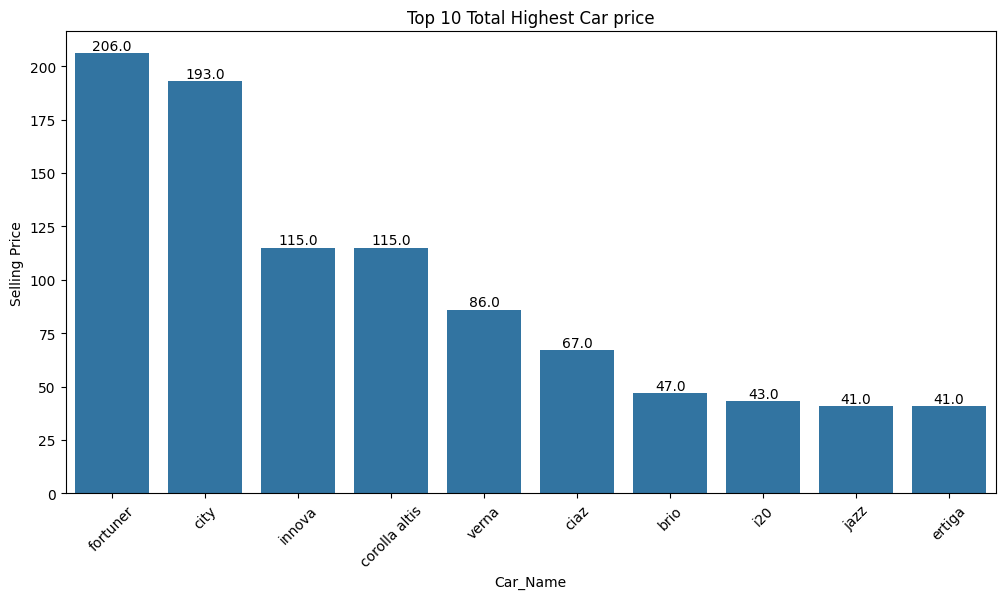

In [ ]:
#Visualization Highest total price
plt.figure(figsize =(12,6))
sns.barplot(x= 'Car_Name',y= 'Selling_Price',data = highcarprice)

# Add labels above bars
for i, value in enumerate(highcarprice['Selling_Price']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Total Highest Car price')
plt.xlabel('Car_Name')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

The Car is highest total selling price is Fortuner.

In [ ]:
##what is the most car km.driven
car_driven = df[['Car_Name','Kms_Driven']]
car_driven = car_driven.sort_values(by = 'Kms_Driven',ascending = False)
car_driven.head(10)

,Car_Name,Kms_Driven
196,Activa 3g,500000
179,Honda Karizma,213000
84,innova,197176
85,camry,142000
77,corolla,135154
53,fortuner,135000
37,800,127000
50,fortuner,104707
200,Bajaj Pulsar 150,92233
54,innova,90000


The Car is highest Kms. Driven is Activa 3g.




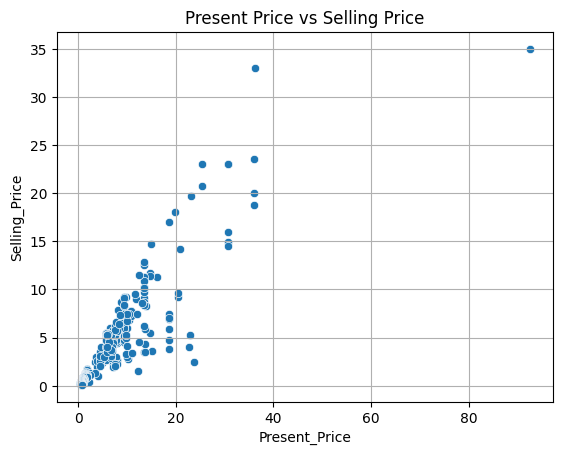

In [ ]:
#Visualization Scatterplot for show relationship between present price and selling price
sns.scatterplot(df,x = 'Present_Price',y = 'Selling_Price')
plt.title('Present Price vs Selling Price')
plt.grid()
plt.show()

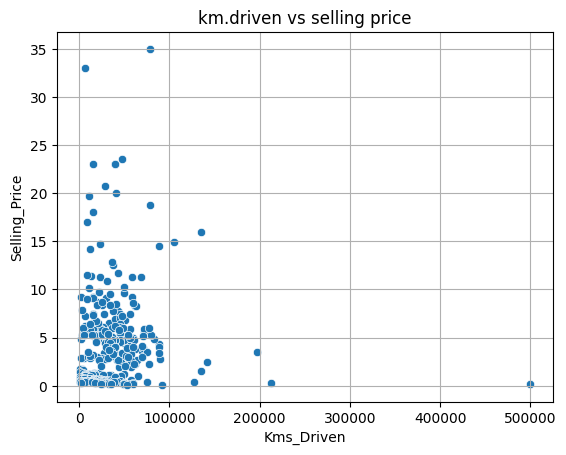

In [ ]:
sns.scatterplot(df , x = 'Kms_Driven',y = 'Selling_Price')
plt.title('km.driven vs selling price')
plt.grid()
plt.show()

Most people like to buy the car have 0-10 kilometers and by the car that selling price have 0-100000.

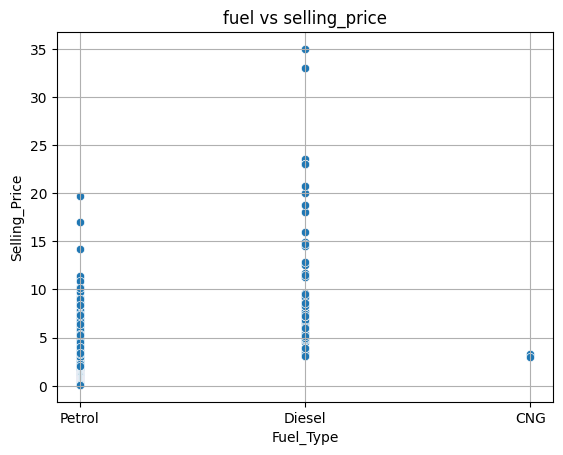

In [ ]:
sns.scatterplot( df, x = 'Fuel_Type',y= 'Selling_Price')
plt.title('fuel vs selling_price')
plt.grid()

* Most common fuel type is Diesel , lowest fuel type is Electric.
* Highest fuel selling price is Diesel fuel type , lowest fuel selling price is LPG.



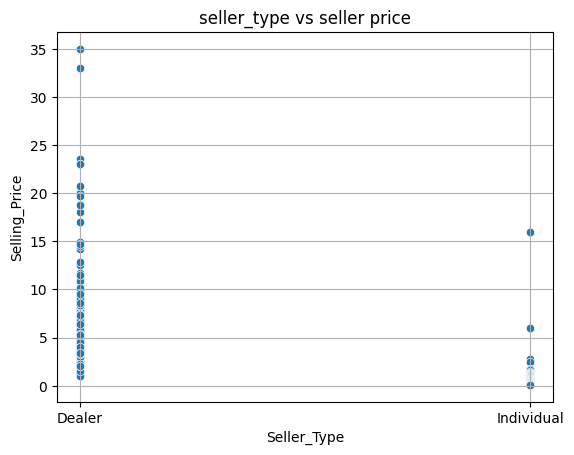

In [ ]:
sns.scatterplot( df, x = 'Seller_Type',y = 'Selling_Price')
plt.title('seller_type vs seller price')
plt.grid()



*   Most common seller type is Dealer type , lowest common seller type is Individual Dealer.
*  Highest price of seller type is Dealer , lowest price of seller type is Individual Dealer.



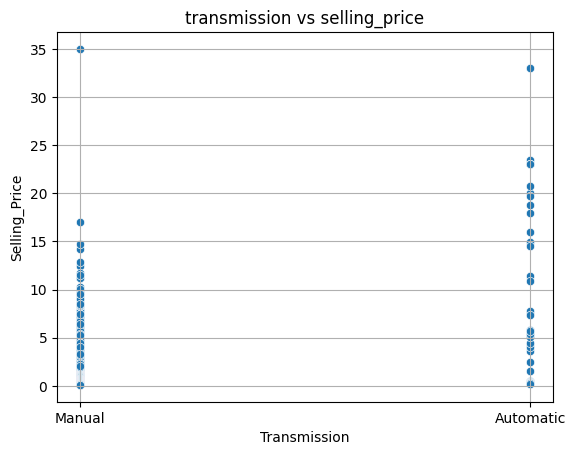

In [ ]:
sns.scatterplot(df, x= 'Transmission',y = 'Selling_Price')
plt.title('transmission vs selling_price')
plt.grid()



*   Car with autometic transmission have more than a car with manual transmission.
*   Manual transmission is cheaper than Automatic transmision but manual transmission easily Maintenance than automatic transmission.



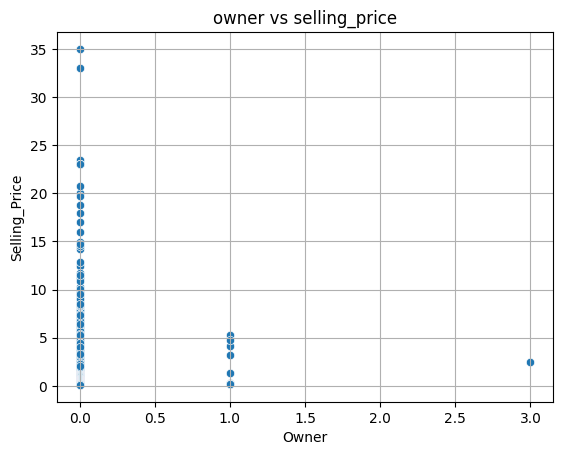

In [ ]:
sns.scatterplot(df, x = 'Owner',y ='Selling_Price')
plt.title('owner vs selling_price')
plt.grid()


A zero owner car is a most expensive than other owner type in dataset because it has never been owned by anyone before , newest condition and has never been used before.


# Step 3. Data Preprocessing

In [ ]:
#Show Outlier Values
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [ ]:
df[df['Present_Price'] > df['Present_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [ ]:
df[df['Owner'] > df['Owner'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [ ]:
#drop outlier index
df = df.drop(index = [64,86,196])

In [ ]:
#Segerate data
Cat_col = df.select_dtypes(include = ['object']).columns
Con_col = df.select_dtypes(exclude = ['object']).columns
df_cat = df[Cat_col]
df_con = df[Con_col]
print(df_cat.columns)
print(df_con.columns)

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')
Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')


In [ ]:
df_cat = df_cat.drop('Car_Name',axis =1)

In [ ]:
#Get dummie variable
dummies = pd.get_dummies(df_cat).astype('float64')

print('dummies shape :',dummies.shape)
dummies.head()

dummies shape : (298, 7)


,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df_merge = pd.concat([df_con,dummies],axis = 1)
df_merge.shape

(298, 11)

In [ ]:
#Visualization Correlation
corr = df_merge.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.879984,0.089233,-0.093339,-0.025277,0.545849,-0.533778,0.592221,-0.592221,0.388902,-0.388902
Present_Price,0.879984,1.000000,0.362701,0.019142,-0.010164,0.487531,-0.479277,0.599187,-0.599187,0.435223,-0.435223
Kms_Driven,0.089233,0.362701,1.000000,0.133654,0.021592,0.267343,-0.268348,0.215345,-0.215345,0.097579,-0.097579
Owner,-0.093339,0.019142,0.133654,1.000000,-0.014418,-0.052148,0.054422,-0.124827,0.124827,0.054297,-0.054297
Fuel_Type_CNG,-0.025277,-0.010164,0.021592,-0.014418,1.000000,-0.040409,-0.163713,0.060630,-0.060630,-0.031425,0.031425
Fuel_Type_Diesel,0.545849,0.487531,0.267343,-0.052148,-0.040409,1.000000,-0.979087,0.344854,-0.344854,0.091581,-0.091581
Fuel_Type_Petrol,-0.533778,-0.479277,-0.268348,0.054422,-0.163713,-0.979087,1.000000,-0.352824,0.352824,-0.084021,0.084021
Seller_Type_Dealer,0.592221,0.599187,0.215345,-0.124827,0.060630,0.344854,-0.352824,1.000000,-1.000000,0.071379,-0.071379
Seller_Type_Individual,-0.592221,-0.599187,-0.215345,0.124827,-0.060630,-0.344854,0.352824,-1.000000,1.000000,-0.071379,0.071379
Transmission_Automatic,0.388902,0.435223,0.097579,0.054297,-0.031425,0.091581,-0.084021,0.071379,-0.071379,1.000000,-1.000000


In [ ]:
X= df_merge.drop(columns = 'Selling_Price',axis = 1)
y = df_merge['Selling_Price']

In [ ]:
#Split train test
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (238, 10)
X_test shape : (60, 10)
y_train shape : (238,)
y_test shape : (60,)


In [ ]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
286,7.90,28569,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
82,25.39,15000,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
110,1.78,6000,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
170,0.83,5500,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
222,7.60,77632,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Step 4. Train,Test Model

**Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Intercept : ",lm.intercept_)

Intercept :  2.402796920040452


In [ ]:
#Predictions linear regression train data
y_pred = lm.predict(X_train)

In [ ]:
#Evalution train score
from sklearn import metrics
import math

print("R2 score: ",metrics.r2_score(y_train,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_train,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2 score:  0.8545044702931673
Mean Absolute Error:  1.135586225283772
mean-squared-error: 2.827531812234339
RMSE: 1.6815266314377357


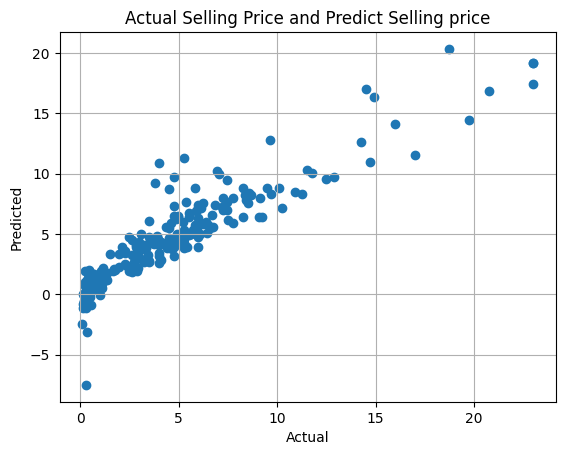

In [ ]:
plt.scatter(y_train,y_pred)
plt.title('Actual Selling Price and Predict Selling price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
#Evalution test linear model
R2_linear = metrics.r2_score(y_test,y_test_pred)
print("R2 score: ",R2_linear)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_test_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 score:  0.9215284384746416
Mean Absolute Error:  1.0198662034928727
mean-squared-error: 1.7809134925870551
RMSE: 1.3345087083219258


**Random Forest Regressor Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 200,max_features= 0.6,
                            min_samples_leaf =2,n_jobs = -1 , oob_score= False)

In [ ]:
#Train Random Forest Regressor
reg.fit(X_train,y_train)

RandomForestRegressor(max_features=0.6, min_samples_leaf=2, n_estimators=200,
                      n_jobs=-1)

In [ ]:
#Prediction with test data
y_pred = reg.predict(X_train)

In [ ]:
#Model Evalution
print("R2 score: ",metrics.r2_score(y_train,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_train,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2 score:  0.9580937505157342
Mean Absolute Error:  0.5219321808541395
mean-squared-error: 0.8143978979075522
RMSE: 0.9024399691434064


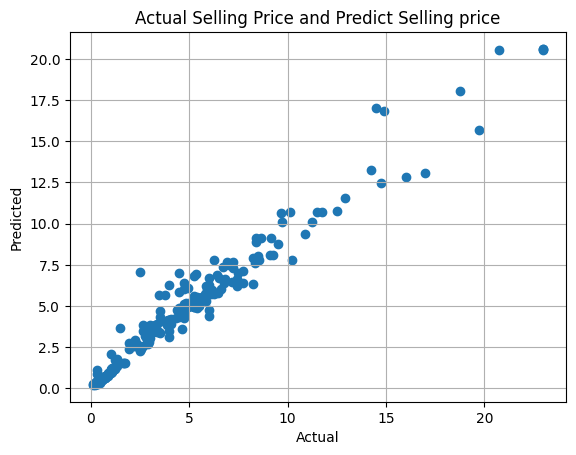

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.title('Actual Selling Price and Predict Selling price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [ ]:
#Predict Random Forest test data
y_test_pred = reg.predict(X_test)

In [ ]:
#model Evalution
R2_Random_forest = metrics.r2_score(y_test,y_test_pred)
print("R2 score: ",R2_Random_forest)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_test_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 score:  0.939308163267417
Mean Absolute Error:  0.7601075882559859
mean-squared-error: 1.3774023203554968
RMSE: 1.1736278457652138


**XGBoost Regressor Model**

In [ ]:
from xgboost import XGBRegressor
XGreg = XGBRegressor(n_estimators = 100,max_depth = 3 ,learning_rate = 0.1)

In [ ]:
#Train XGBoost model
XGreg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Prediction train data with XGBoost model
y_pred = XGreg.predict(X_train)

In [ ]:
#Model Evalution
print("R2 score: ",metrics.r2_score(y_train,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_train,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2 score:  0.9854496526177787
Mean Absolute Error:  0.3603237843513489
mean-squared-error: 0.2827686196626792
RMSE: 0.5317599267175736


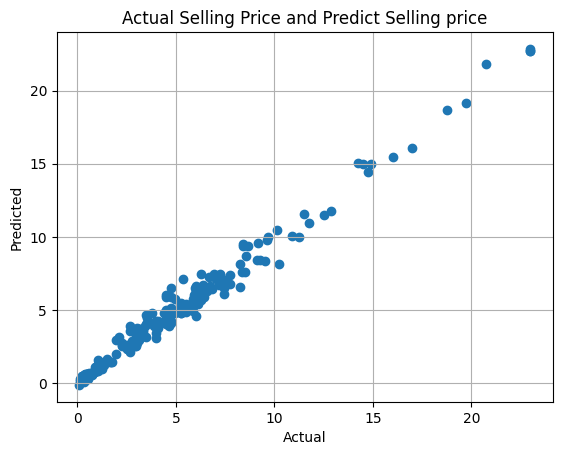

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.title('Actual Selling Price and Predict Selling price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [ ]:
#Prediction Test data with XGBoost model
y_test_pred = XGreg.predict(X_test)

In [ ]:
R2_XGBoost = metrics.r2_score(y_test,y_test_pred)
print("R2 score: ",R2_XGBoost)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_test_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 score:  0.9366894007069682
Mean Absolute Error:  0.8155790034929912
mean-squared-error: 1.4368351835116333
RMSE: 1.1986806011242668


# Step 5. Evaluation and comparision of all the models

In [ ]:
models = pd.DataFrame({'model':['Linear Regression','Random_Forest','XGBoost'],
                       'R2 Score':[R2_linear,R2_Random_forest,R2_XGBoost]})
models.sort_values(by = 'R2 Score',ascending = False)

,model,R2 Score
1,Random_Forest,0.939308
2,XGBoost,0.936689
0,Linear Regression,0.921528


Random Forest Regressor and XGBoost almost equal R2 but I think Random Forest is best prediction model for this dataset.